This is a tutorial on training a model for NER on a dataset in Serbian through Python's Spacy NLP library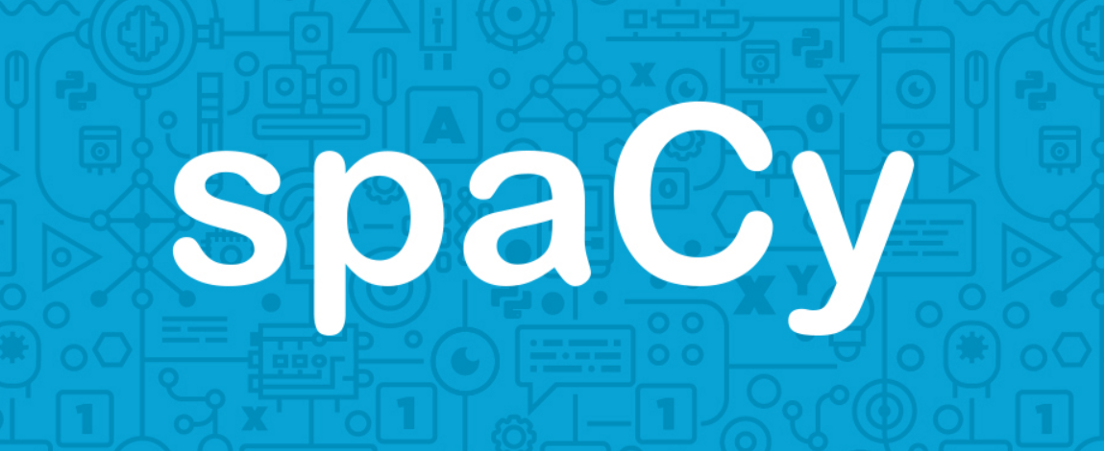

In [1]:
import spacy

In [2]:
#Spacy already gives the option to perform some text manipulation for texts that are in Serbian
from spacy.lang.sr import Serbian
nlp = Serbian()
#the nlp() function
doc = nlp("Tekst koji će spejsi obraditi.")

first_token = doc[0]
print(first_token.text)

# A slice from doc that outputs the first 4 tokens
spejsi = doc[0:4]
print(spejsi.text)


Tekst
Tekst koji će spejsi


In [3]:
#What the spacy library can do for languages such as English

import spacy

nlp = spacy.load("en_core_web_sm")

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value. Apple has released it's newest iPhoneX recently."

# Obradi tekst
doc = nlp(text)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print("{:<12}{:<10}{:<10}".format(token_text, token_pos, token_dep))
    
# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)
    
# Get the span for "iPhone X"
iphone_x = doc[26]

# Print the span text
print("Missing entity:", iphone_x.text)

It          PRON      nsubj     
’s          VERB      ROOT      
official    ADJ       acomp     
:           PUNCT     punct     
Apple       PROPN     nsubj     
is          AUX       ROOT      
the         DET       det       
first       ADJ       amod      
U.S.        PROPN     nmod      
public      ADJ       amod      
company     NOUN      attr      
to          PART      aux       
reach       VERB      relcl     
a           DET       det       
$           SYM       quantmod  
1           NUM       compound  
trillion    NUM       nummod    
market      NOUN      compound  
value       NOUN      dobj      
.           PUNCT     punct     
Apple       PROPN     nsubj     
has         AUX       aux       
released    VERB      ROOT      
it          PRON      nsubj     
's          AUX       ccomp     
newest      ADJ       acomp     
iPhoneX     NOUN      dobj      
recently    ADV       advmod    
.           PUNCT     punct     
Apple ORG
first ORDINAL
U.S. GPE
$1 trillio

In [4]:
#My input comes in the form of an xml file, but a json file that contains more detailed annotations can be an input as well.
xml='<LOC>Milano</LOC>, poznati italijanski grad i prestonica mode, nalazi se u severnom delu države i drugi je grad po veličini.\n Čuven je po svojoj katedrali i operi ”Milanska skala”.\nU <LOC>Milano</LOC> smo leteli iz <LOC>Temišvara</LOC>, kada smo išli za <LOC>Maroko</LOC>, a cena jedne povratne karte je bila 10€.\nInformacije o letovima, kao i o paket aranžmanu smo delili sa vama u ranijim postovim, a uskoro ćemo opet objaviti povoljne opcije za <LOC>Milano</LOC>.\nOd aerodroma <LOC>Bergamo</LOC> (Orio AL Serio) koji se nalazi na 45 km od <LOC>Milana</LOC>, do glavne železničke stanice najbolje i najjeftinije možete doći shuttle busom.\nAutobusi koštaju 5€ u jednom pravcu i saobraćaju na pola sata.\nKarte možete kupiti na licu mesta pre ulaska u autobus ali i on-line, a na ovim linkoma možete kupiti karte ili pogledati red vožnje: terravision i orioshuttle.\nOvde možete videti neke avio karte iz <LOC>Temišvara</LOC> do <LOC>Milana</LOC>.\nTakođe možete promeniti mesto polaska, ako želite da bude <LOC>Niš</LOC> na primer, jer i odatle imate jeftine avio karte.\nDo Budimpešte možete stići preko nekoliko agencija iz <LOC>Beograda</LOC> i <LOC>Novog Sada</LOC> koje rade transfere do aerodroma, kolima ili vozom.\nNajpovoljnije je vozom po ceni od 20€ za povratnu kartu NS-Budimpešta.\nTakođe možete koristiti i blablacar.\nOva cena karte važi ukoliko nosite samo jedan ručni prtljag dimenzija 40x20x25cm dok uz doplatu možete poneti još i kofer, ali detaljnije pročitajte u postu.\nIdeja je bila otići na 3 meseca u <LOC>Aziju</LOC>.\nPočeti od <LOC>Tajlanda</LOC> i zatim otići u <LOC>Vijetnam</LOC>, a onda možda <LOC>Laos</LOC>, možda <LOC>Kambodža</LOC>, možda <LOC>Bali</LOC>, <LOC>Filipini</LOC>, pa posle i <LOC>Kina</LOC>, <LOC>Singapur</LOC>, ko zna.\nPuštamo da nas put vodi.\nSve ovo je podrazumevalo da se nas dvoje uklopimo u budžet od 30€ (znači 15 po osobi) za sve.\nKad kažemo sve mislimo na smeštaj, hranu, izlete, prevoz između gradova (vozovi, busevi, avioni, brodovi), ulaznice za neke lokalitete, suvenire… \nPojedine države u <LOC>Aziji</LOC> jesu jeftine, ali je let do tamo stavka, pa nam je neko vreme budžet bio čak i manji.\nNegde je to bio pravi izazov, a negde je bilo lako.\nOvde nije bila poenta da idemo i preživljavamo, da jedemo jedan obrok dnevno, a spavamo na baš nekim horor mestima, već da u naš budžet probamo da se uklopimo što bolje, da se snalazimo, cenkamo (tamo to svakako svi vole i praktikuju) i kada nam se budžet istanji da nađemo negde gde bismo mogli da radimo.\nSmešteni smo bili u gostinskim kućama, malim hotelima, ali i hostelima kako na Tajlandu, tako i u drugim državama Vijetnamu, Singapuru i Baliju.\nKako smo sa <LOC>Tajlanda</LOC> prešli u <LOC>Vijetnam</LOC>, uvideli smo da je sve dosta jeftinije i da ako ne posećujemo neka novootvorena popularna turistička mesta nije neki izazov uklopiti se u budžet.\nSmeštaj nam je uglavnom bio do nekih 10€ za oboje, mada u par navrata i mnogo niže (čak jednom i 4).\nHranili smo se nekad i u restoranu, a u gradu <LOC>Hue</LOC> smo u vegetarijanskom restoranu platili pirinač sa raznim povrćem i to dve prilično velike porcije, dve supice i jednu porciju rolnica sa povrćem i sos samo 1,2€.\nUkupno smo ručali za te pare.\nSmeštaj u tom gradu nam je bio oko 10€ u nekom malom hotelu, tako da smo ovde mogli i u izlazak, da sednemo na pivo koje je samo nekih 0,35€.\n<LOC>Moskva</LOC> je grad od koga nismo ništa očekivali, a oduševio nas je. Lepa, neobična arhitektura, veliki trgovi, bulevari, metro stanice…\nVeoma nam se dopalo mnogo toga, malo stvari nije. <LOC>Moskva</LOC> čak i nije skup grad kao što neki pričaju.\nJedan od glavnih razloga što preporučujemo <LOC>Moskvu</LOC> je i taj što iz <LOC>Budimpešte</LOC> možete naći povratnu avio kartu već od 76€, a ako imate članstvo ona može biti još jeftinija.\nDo <LOC>Gdanjska</LOC> imate malo da se iscimate i verovatno ćete morati da presedate, sigurno ćete morati da presedate.\nMi smo bili na zimu 2017. godine i preporučujemo da ga obiđete kad su dani malo duži i lepše je vreme.\nOvaj simpatičan gradić smešten je na severu <LOC>Poljske</LOC>.\nVelik deo je uništen za vreme i posle Drugog svetskog rata, ali na insistiranje vlasti u ovoj državi oni koji su ga uništili morali su da ga vrate u prvobitni izgled.\nPodseća, sa svojim uzanim fasadama, na druge severne gradove kao što su <LOC>Kompenhagen</LOC>, <LOC>Amsterdam</LOC>…O <LOC>Rimu</LOC> jednostavno ne mora puno da se priča.\nOni koji su bili znaju da će tamo otići opet nekad, oni koji nisu, videli su na slikama i imaju okvirno ideju šta bi obišli.\nMi smo dva puta bili i mislimo da će se ta poseta opet ponoviti.\n '

In [5]:
print(xml)

<LOC>Milano</LOC>, poznati italijanski grad i prestonica mode, nalazi se u severnom delu države i drugi je grad po veličini.
 Čuven je po svojoj katedrali i operi ”Milanska skala”.
U <LOC>Milano</LOC> smo leteli iz <LOC>Temišvara</LOC>, kada smo išli za <LOC>Maroko</LOC>, a cena jedne povratne karte je bila 10€.
Informacije o letovima, kao i o paket aranžmanu smo delili sa vama u ranijim postovim, a uskoro ćemo opet objaviti povoljne opcije za <LOC>Milano</LOC>.
Od aerodroma <LOC>Bergamo</LOC> (Orio AL Serio) koji se nalazi na 45 km od <LOC>Milana</LOC>, do glavne železničke stanice najbolje i najjeftinije možete doći shuttle busom.
Autobusi koštaju 5€ u jednom pravcu i saobraćaju na pola sata.
Karte možete kupiti na licu mesta pre ulaska u autobus ali i on-line, a na ovim linkoma možete kupiti karte ili pogledati red vožnje: terravision i orioshuttle.
Ovde možete videti neke avio karte iz <LOC>Temišvara</LOC> do <LOC>Milana</LOC>.
Takođe možete promeniti mesto polaska, ako želite da b

In [6]:
#In order for spacy to read the tags we need to define where the tagged token starts and ends.
xml2spacy(xml)

NameError: name 'xml2spacy' is not defined

In [7]:
#From Spacy 3.0 the information on the data is stored in DocBin objects which are a collection of doc objects.
import srsly
import typer
import warnings
from pathlib import Path

import spacy
from spacy.tokens import DocBin

TRAIN_DATA = [('Milano, poznati italijanski grad i prestonica mode, nalazi se u severnom delu države i drugi je grad po veličini.',
  {'entities': [(0, 6, 'LOC')]}),
 ('U Milano smo leteli iz Temišvara, kada smo išli za Maroko, a cena jedne povratne karte je bila 10€.',
  {'entities': [(2, 8, 'LOC'), (23, 32, 'LOC'), (51, 57, 'LOC')]}),
 ('Informacije o letovima, kao i o paket aranžmanu smo delili sa vama u ranijim postovim, a uskoro ćemo opet objaviti povoljne opcije za Milano.',
  {'entities': [(134, 140, 'LOC')]}),
 ('Od aerodroma Bergamo (Orio AL Serio) koji se nalazi na 45 km od Milana, do glavne železničke stanice najbolje i najjeftinije možete doći shuttle busom.',
  {'entities': [(13, 20, 'LOC'), (64, 70, 'LOC')]}),
 ('Ovde možete videti neke avio karte iz Temišvara do Milana.',
  {'entities': [(38, 47, 'LOC'), (51, 57, 'LOC')]}),
 ('Takođe možete promeniti mesto polaska, ako želite da bude Niš na primer, jer i odatle imate jeftine avio karte.',
  {'entities': [(58, 61, 'LOC')]}),
 ('Do Budimpešte možete stići preko nekoliko agencija iz Beograda i Novog Sada koje rade transfere do aerodroma, kolima ili vozom.',
  {'entities': [(54, 62, 'LOC'), (65, 75, 'LOC')]}),
 ('Ideja je bila otići na 3 meseca u Aziju.', {'entities': [(34, 39, 'LOC')]}),
 ('Početi od Tajlanda i zatim otići u Vijetnam, a onda možda Laos, možda Kambodža, možda Bali, Filipini, pa posle i Kina, Singapur, ko zna.',
  {'entities': [(10, 18, 'LOC'),
    (35, 43, 'LOC'),
    (58, 62, 'LOC'),
    (70, 78, 'LOC'),
    (86, 90, 'LOC'),
    (92, 100, 'LOC'),
    (113, 117, 'LOC'),
    (119, 127, 'LOC')]}),
 ('Pojedine države u Aziji jesu jeftine, ali je let do tamo stavka, pa nam je neko vreme budžet bio čak i manji.',
  {'entities': [(18, 23, 'LOC')]}),
 ('Kako smo sa Tajlanda prešli u Vijetnam, uvideli smo da je sve dosta jeftinije i da ako ne posećujemo neka novootvorena popularna turistička mesta nije neki izazov uklopiti se u budžet.',
  {'entities': [(12, 20, 'LOC'), (30, 38, 'LOC')]}),
 ('Hranili smo se nekad i u restoranu, a u gradu Hue smo u vegetarijanskom restoranu platili pirinač sa raznim povrćem i to dve prilično velike porcije, dve supice i jednu porciju rolnica sa povrćem i sos samo 1,2€.',
  {'entities': [(46, 49, 'LOC')]}),
 ('Moskva je grad od koga nismo ništa očekivali, a oduševio nas je. Lepa, neobična arhitektura, veliki trgovi, bulevari, metro stanice…',
  {'entities': [(0, 6, 'LOC')]}),
 ('Veoma nam se dopalo mnogo toga, malo stvari nije. Moskva čak i nije skup grad kao što neki pričaju.',
  {'entities': [(50, 56, 'LOC')]}),
 ('Jedan od glavnih razloga što preporučujemo Moskvu je i taj što iz Budimpešte možete naći povratnu avio kartu već od 76€, a ako imate članstvo ona može biti još jeftinija.',
  {'entities': [(43, 49, 'LOC'), (66, 76, 'LOC')]}),
 ('Do Gdanjska imate malo da se iscimate i verovatno ćete morati da presedate, sigurno ćete morati da presedate.',
  {'entities': [(3, 11, 'LOC')]}),
 ('Ovaj simpatičan gradić smešten je na severu Poljske.',
  {'entities': [(44, 51, 'LOC')]}),
 ('Podseća, sa svojim uzanim fasadama, na druge severne gradove kao što su Kompenhagen, Amsterdam…O Rimu jednostavno ne mora puno da se priča.',
  {'entities': [(72, 83, 'LOC'), (85, 94, 'LOC'), (97, 101, 'LOC')]}),
('Kao organizator grupe označen je Goran Mojović, kapetan Vojske Srbije u penziji.',
  {'entities': [(33, 46, 'PERS')]}),
 ('Biljana Mojović, službenik, major pravnik Mihailo Živković,',
  {'entities': [(0, 15, 'PERS'), (42, 58, 'PERS')]}),
 ('načelnik odeljenja u Direkciji za imovinsko-pravne poslove Ministarstva odbrane, Ljubica Torbica, državni službenik u odeljenju za stambene poslove Ministarstva odbrane, Nikola Tomašević, državni službenik u odeljenju za stambene poslove Ministarstva odbrane, vojni penzioner Dragan Kovačić,',
  {'entities': [(81, 96, 'PERS'), (170, 186, 'PERS'), (276, 290, 'PERS')]}),
 ('potpukovnik u Vojsci Republike Srpske, penzioner Stevan Simić, bivši državni službenik u Vojsci Republike Srpske Krajine, penzioner Dušan Džulović, Nataša Jovanović, državni službenik u Gradskom sekretarijatu za socijalnu i dečju zaštitu, penzionisani zastavnik Novica Mihajlović, nalazio se na dužnosti referenta',
  {'entities': [(49, 61, 'PERS'),
    (132, 146, 'PERS'),
    (148, 164, 'PERS'),
    (262, 279, 'PERS')]}),
 ('za stambene poslove na VMA, Stevo Trivić, penzionisan kapetan bojnog broda, koji se pred penzionisanje',
  {'entities': [(28, 40, 'PERS')]}),
 ('pukovnik lekar Ivica Medenica, ortoped na VMA, pukovnik lekar Jovan Jugović, načelnik Kabineta za',
  {'entities': [(15, 29, 'PERS'), (62, 75, 'PERS')]}),
 ('Policija je uhapsila i trojicu korisnika usluga ove kriminalne grupe - radnika Uroša Malića,',
  {'entities': [(79, 91, 'PERS')]}),
 ('vozača Željka Božića i radnika Ljubomira Parentu.',
  {'entities': [(7, 20, 'PERS'), (31, 48, 'PERS')]}),
 ('Ortoped Ivica Medenica idoktor Jovan Jugović, načelnik kabineta za psihijatriju, kako saznajemo,',
  {'entities': [(8, 22, 'PERS'), (31, 44, 'PERS')]}),
 ('povodom hapšenja Dragan Šutanovac, ministar odbrane.',
  {'entities': [(17, 33, 'PERS')]})]

VALID_DATA = [('Kao organizator grupe označen je Goran Mojović, kapetan Vojske Srbije u penziji.',
  {'entities': [(33, 46, 'PERS')]}),
 ('Biljana Mojović, službenik, major pravnik Mihailo Živković,',
  {'entities': [(0, 15, 'PERS'), (42, 58, 'PERS')]}),
 ('načelnik odeljenja u Direkciji za imovinsko-pravne poslove Ministarstva odbrane, Ljubica Torbica, državni službenik u odeljenju za stambene poslove Ministarstva odbrane, Nikola Tomašević, državni službenik u odeljenju za stambene poslove Ministarstva odbrane, vojni penzioner Dragan Kovačić,',
  {'entities': [(81, 96, 'PERS'), (170, 186, 'PERS'), (276, 290, 'PERS')]}),
 ('potpukovnik u Vojsci Republike Srpske, penzioner Stevan Simić, bivši državni službenik u Vojsci Republike Srpske Krajine, penzioner Dušan Džulović, Nataša Jovanović, državni službenik u Gradskom sekretarijatu za socijalnu i dečju zaštitu, penzionisani zastavnik Novica Mihajlović, nalazio se na dužnosti referenta',
  {'entities': [(49, 61, 'PERS'),
    (132, 146, 'PERS'),
    (148, 164, 'PERS'),
    (262, 279, 'PERS')]}),
 ('za stambene poslove na VMA, Stevo Trivić, penzionisan kapetan bojnog broda, koji se pred penzionisanje',
  {'entities': [(28, 40, 'PERS')]}),
 ('pukovnik lekar Ivica Medenica, ortoped na VMA, pukovnik lekar Jovan Jugović, načelnik Kabineta za',
  {'entities': [(15, 29, 'PERS'), (62, 75, 'PERS')]}),
 ('Policija je uhapsila i trojicu korisnika usluga ove kriminalne grupe - radnika Uroša Malića,',
  {'entities': [(79, 91, 'PERS')]}),
 ('vozača Željka Božića i radnika Ljubomira Parentu.',
  {'entities': [(7, 20, 'PERS'), (31, 48, 'PERS')]}),
 ('Ortoped Ivica Medenica idoktor Jovan Jugović, načelnik kabineta za psihijatriju, kako saznajemo,',
  {'entities': [(8, 22, 'PERS'), (31, 44, 'PERS')]}),
 ('povodom hapšenja Dragan Šutanovac, ministar odbrane.',
  {'entities': [(17, 33, 'PERS')]})]

def convert(lang: str, TRAIN_DATA, output_path: Path):
    nlp = spacy.blank("sr")
    db = DocBin()
    for text, annot in TRAIN_DATA:
        doc = nlp.make_doc(text)
        ents = []
        for start, end, label in annot["entities"]:
            span = doc.char_span(start, end, label=label)
            if span is None:
                msg = f"Skipping entity [{start}, {end}, {label}] in the following text because the character span '{doc.text[start:end]}' does not align with token boundaries:\n\n{repr(text)}\n"
                warnings.warn(msg)
            else:
                ents.append(span)
        doc.ents = ents
        db.add(doc)
    db.to_disk(output_path) 


In [8]:
convert("sr", TRAIN_DATA, "data/train.spacy")
convert("sr", VALID_DATA, "data/valid.spacy")

In order to train the model on this data that we've made we need to create the configuration file. On Spacy's documentation page https://spacy.io/usage/training#quickstart you can download the base_config.cfg file choosing the language and the components. In this case we want the config file for Serbian and named entity recognition.

In [9]:
!python -m spacy init fill-config data/base_config.cfg data/config.cfg
#Please add the path to the training and validation data in the base_config.cfg file that you've downloaded or the one I enclosed together with this file.

[+] Auto-filled config with all values
[+] Saved config
data\config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [10]:
!python -m spacy train data/config.cfg --output ./models/output

[i] Saving to output directory: models\output
[i] Using CPU

=========================== Initializing pipeline ===========================
[+] Initialized pipeline

============================= Training pipeline =============================
[i] Pipeline: ['tok2vec', 'ner']
[i] Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     44.00    0.00    0.00    0.00    0.00
 30     200         41.76    938.16  100.00  100.00  100.00    1.00
 68     400          0.00      0.00  100.00  100.00  100.00    1.00
114     600          0.00      0.00  100.00  100.00  100.00    1.00
171     800          5.50      4.10  100.00  100.00  100.00    1.00
237    1000          0.00      0.00  100.00  100.00  100.00    1.00
324    1200          0.00      0.00  100.00  100.00  100.00    1.00
424    1400         51.65     13.43  100.00  100.00  100.00    1.00
524    1600   

[2022-12-11 16:05:49,695] [INFO] Set up nlp object from config
[2022-12-11 16:05:49,716] [INFO] Pipeline: ['tok2vec', 'ner']
[2022-12-11 16:05:49,721] [INFO] Created vocabulary
[2022-12-11 16:05:49,723] [INFO] Finished initializing nlp object
[2022-12-11 16:05:49,867] [INFO] Initialized pipeline components: ['tok2vec', 'ner']


In [14]:
#Now we have a working model that we can load and perform some NLP on our set of texts.
trained_nlp = spacy.load("models/output/model-best")
text = input()
doc = trained_nlp(text)

for ent in doc.ents:
    print (ent.text, ent.label_)

S obzirom da je AirSerbia uvela direktan let od Beograda do Izmira, odlučili smo da potražimo par termina koji bi vam mogli biti zanimljivi za posetu ovog grada i gde bi cena bila koliko, toliko pristupačna. S obzirom da je ovo direktan let, da je Turska veoma pristupačna sa cenama, kako smeštaja, tako i hrane i pića, onda bi i odlazak na ovu destinaciju mogao da se svrsta upovoljno putovanje. Još ako uzmemo u obzir i činjenicu da ovde možete otići i na letovanje onda je to još jedna prednost.
AirSerbia LOC
Beograda LOC
Izmira LOC
Turska LOC


In [12]:
#In order for the recognized entities to show clearer we can use the displacy library which uses different coloring for different type of named entity.
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

THANK YOU FOR WANTING TO TAKE PART IN THIS TUTORIAL. I HOPE THAT YOU WILL GET THE IDEA TO DO SOMETHING LIKE THIS, MORE SISTEMATICALLY AND ON A LARGER SCALE, FOR YOU RESPECTIVE LANGUAGES THAT DON'T HAVE A BULT-IN PIPELINE IN SPACY ALREADY.

In [1]:
def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f)
    return(data)

In [4]:
loc_train = load_data("data/loc_train.json")
print (loc_train[0])




Ä'

FileNotFoundError: [Errno 2] No such file or directory: 'data/loc_train.json'